In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = os.path.join(os.getcwd(), 'Data', 'Raw Data')
file_list = os.listdir(folder_path)

df = pd.DataFrame()
for file in file_list:
    file_path = os.path.join(folder_path, file)
    file_df = pd.read_excel(file_path, sheet_name='Raw')
    df = pd.concat([df, file_df], ignore_index=True)

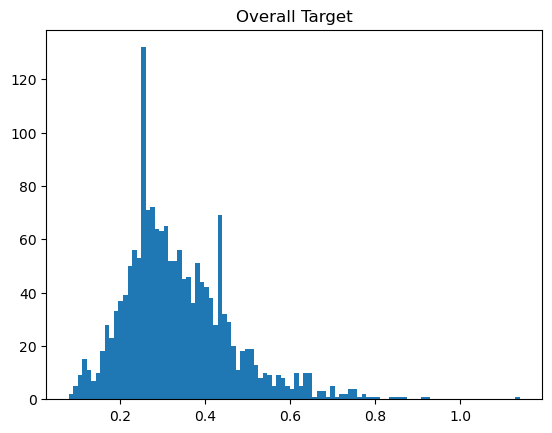

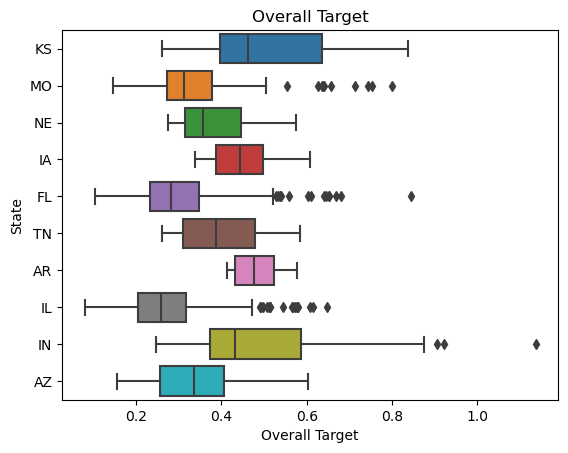

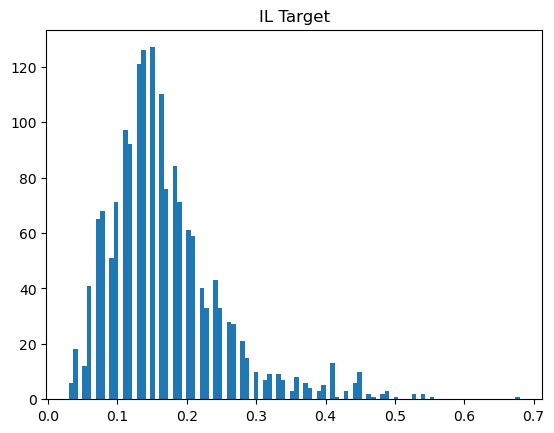

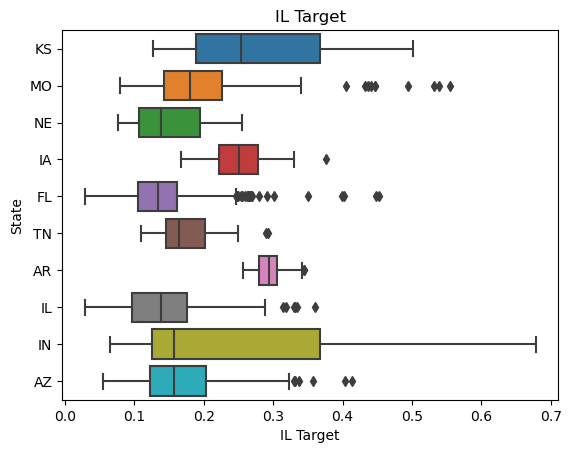

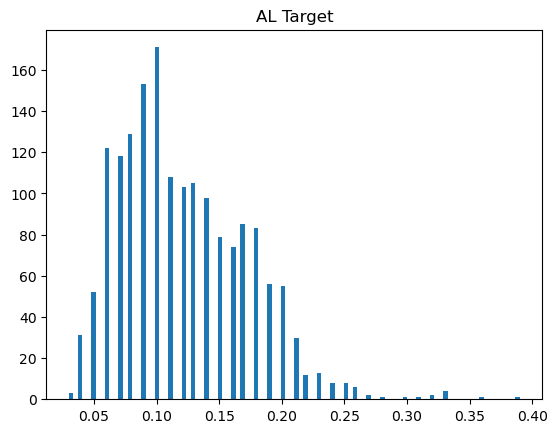

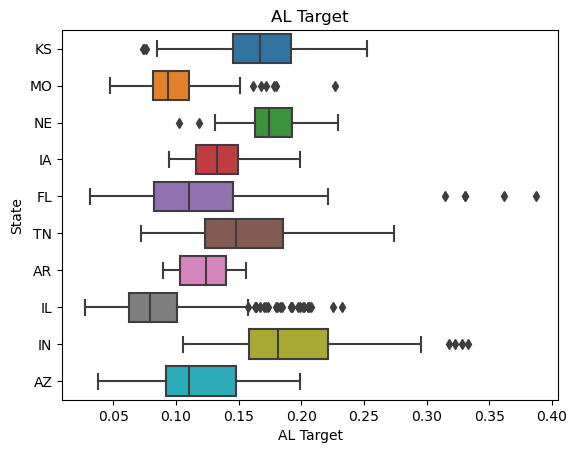

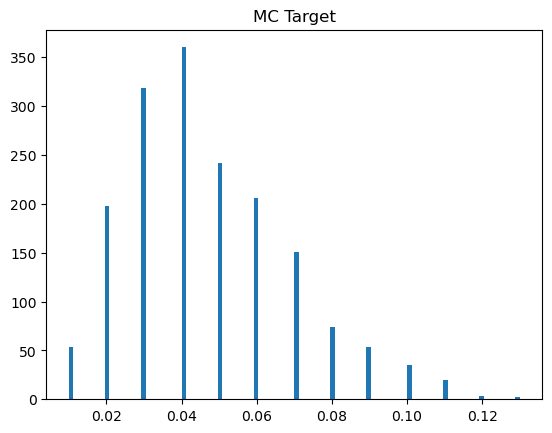

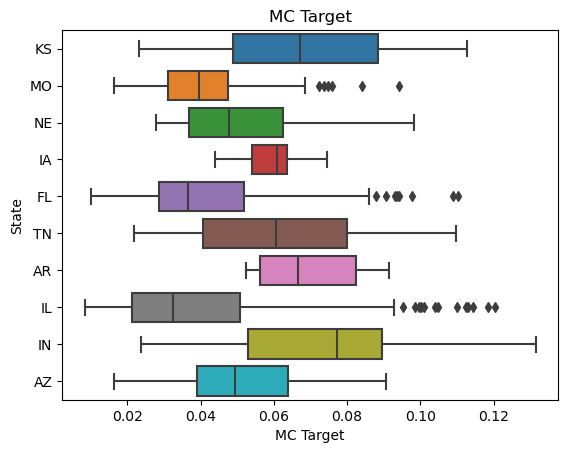

In [4]:
#Build target columns
target_cols = ['Global Income Qualified 75+ CY', 'NIC MAP Occupancy - IL', 'NIC MAP Occupancy - AL', 'NIC MAP Occupancy - MC', 'Total IL Supply CY', 'Total AL Supply CY', 'Total MC Supply CY']
df = df.dropna(subset=target_cols)
df['IL Occupied Units'] = df.apply(lambda x: x['NIC MAP Occupancy - IL'] * x['Total IL Supply CY'], axis=1)
df['AL Occupied Units'] = df.apply(lambda x: x['NIC MAP Occupancy - AL'] * x['Total AL Supply CY'], axis=1)
df['MC Occupied Units'] = df.apply(lambda x: x['NIC MAP Occupancy - MC'] * x['Total MC Supply CY'], axis=1)

df['Overall Target'] = df.apply(lambda x: (x['IL Occupied Units']+x['AL Occupied Units']+x['MC Occupied Units'])/x['Global Income Qualified 75+ CY'], axis=1)
df['IL Target'] = df.apply(lambda x: x['IL Occupied Units']/x['Global Income Qualified 75+ CY'], axis=1)
df['AL Target'] = df.apply(lambda x: x['AL Occupied Units']/x['Global Income Qualified 75+ CY'], axis=1)
df['MC Target'] = df.apply(lambda x: x['MC Occupied Units']/x['Global Income Qualified 75+ CY'], axis=1)


def plot_target(df, target, title):
    target_df = df[target].round(2)
    plt.hist(target_df, bins=100)
    plt.title(title)
    plt.show()

target_cols = ['Overall Target', 'IL Target', 'AL Target', 'MC Target']
for target in target_cols: 
    plot_target(df, target, target)

    sns.boxplot(data=df, x=target, y='State')
    plt.title(target)
    plt.show()

